# Idea 1

Prefix sum is a technique that can be used on arrays (of numbers). The idea is to create an array prefix where `prefix[i]` is the sum of all elements up to the index `i` (inclusive). For example, given `nums = [5, 2, 1, 6, 3, 8]`, we would have `prefix = [5, 7, 8, 14, 17, 25]`.

When a subarray starts at index `0`, it is considered a "prefix" of the array. A prefix sum represents the sum of all prefixes.
Prefix sums allow us to find the sum of any subarray in `O(1)`.

If we want the sum of the subarray from `i` to `j` (inclusive), then the answer is **`prefix[j] - prefix[i - 1]`, or `prefix[j] - prefix[i] + nums[i]` if you don't want to deal with the out of bounds case when `i = 0`.**

This works because `prefix[i - 1]` is the sum of all elements before index `i`. When you subtract this from the sum of all elements up to index `j`, you are left with the sum of all elements starting at index `i` and ending at index `j`, which is exactly what we are looking for.

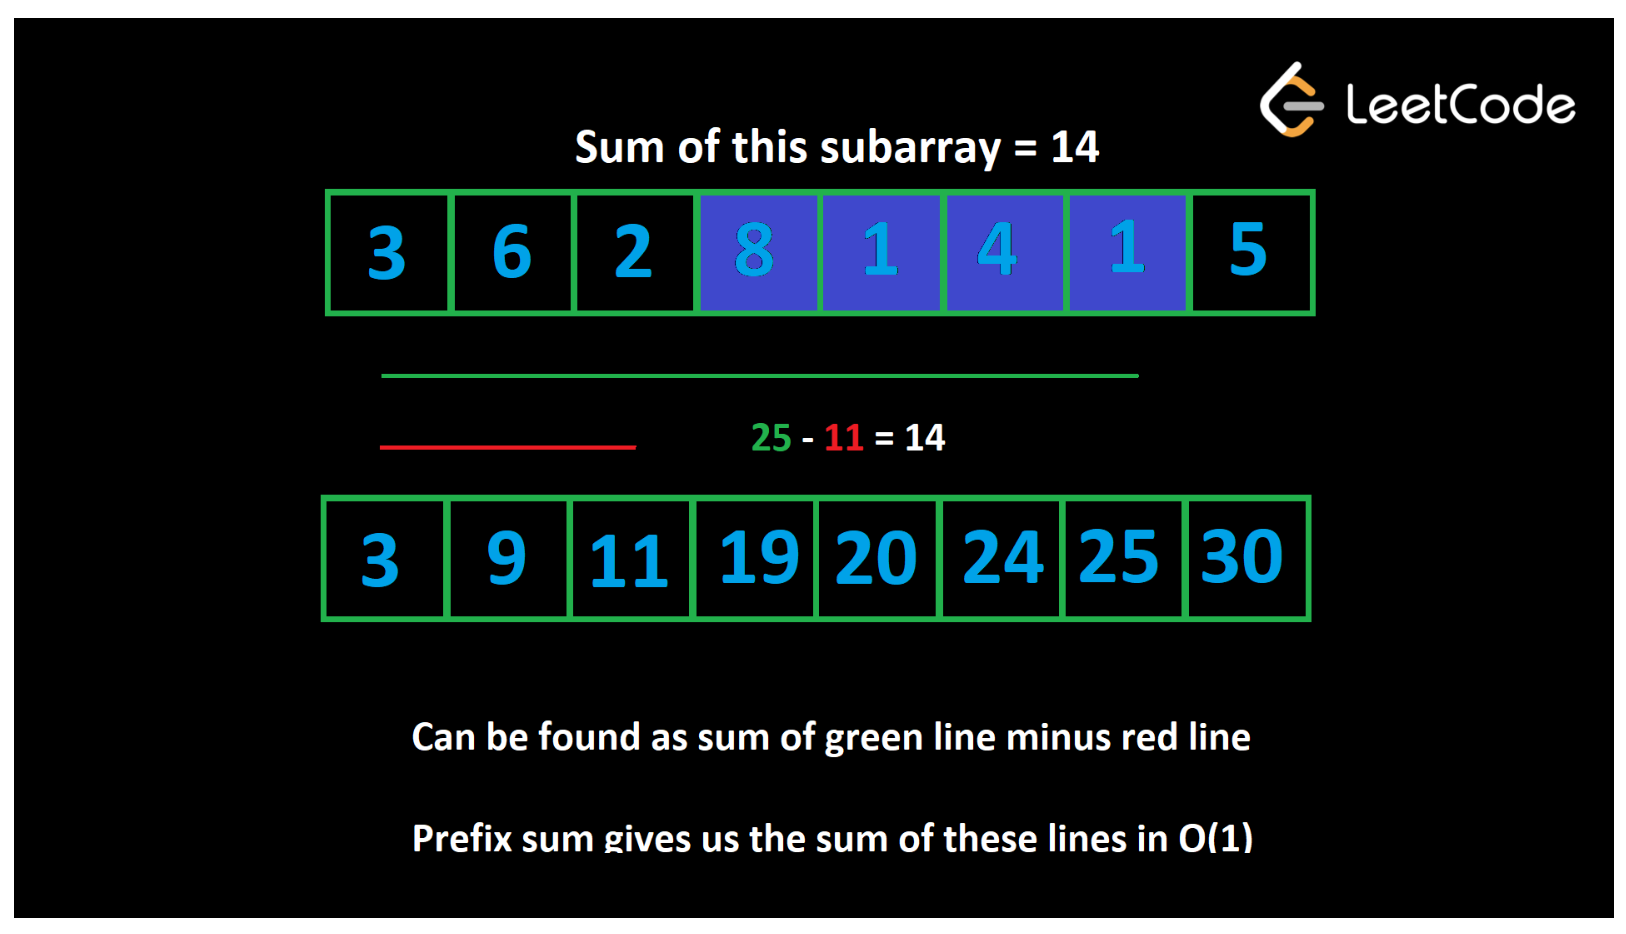

```python
// Given an array nums

prefix = [nums[0]]
for (int i = 1; i < nums.length; i++)
    prefix.append(nums[i] + prefix[prefix.length - 1])
```

## Example 1
**Given an integer array `nums`, an array `queries` where `queries[i] = [x, y]` and an integer `limit`, return a boolean array that represents the answer to each query. A query is true if the sum of the subarray from `x` to `y` is less than `limit`, or `false` otherwise.**

For example, given `nums = [1, 6, 3, 2, 7, 2]`, `queries = [[0, 3], [2, 5], [2, 4]]`, and `limit = 13`, the answer is `[true, false, true]`. For each query, the subarray sums are `[12, 14, 12]`.

In [3]:
def answer_queries(nums, queries, limit):
    prefix = [nums[0]]
    for i in range(1, len(nums)):
        prefix.append(nums[i] + prefix[-1])

    ans = []
    for l, r in queries:
        ans.append(prefix[r] - prefix[l] + nums[l] < limit)
    return ans

In [4]:
answer_queries([1, 6, 3, 2, 7, 2], [[0, 3], [2, 5], [2, 4]], 13)

[True, False, True]

## Example 2 ([2270. Number of Ways to Split Array](https://leetcode.com/problems/number-of-ways-to-split-array/description/))

**Given an integer array `nums`, find the number of ways to split the array into two parts so that the first section has a sum greater than or equal to the sum of the second section. The second section should have at least one number.**

In [5]:
def ways_to_split_array(nums: list[int]) -> int:
    total_sum = sum(nums)
    left_section_sum = 0
    ans = 0

    for i in range(len(nums) - 1):
        left_section_sum += nums[i]
        right_section_sum = total_sum - left_section_sum
        if left_section_sum >= right_section_sum:
            ans += 1
    return ans 

In [7]:
ways_to_split_array([10, 4, -8, 7])

2

# Homework

## Problem 1 ([1480. Running Sum of 1d Array](https://leetcode.com/problems/running-sum-of-1d-array/editorial/))

In [8]:
def running_sum(nums: list[int]) -> list[int]:
    prefix = [nums[0]]
    for i in range(1, len(nums)):
        prefix.append(nums[i] + prefix[-1])
    return prefix

In [9]:
running_sum([1, 2, 3])

[1, 3, 6]

## Problem 2 ([1413. Minimum Value to Get Positive Step by Step Sum](https://leetcode.com/problems/minimum-value-to-get-positive-step-by-step-sum/description/))

In [10]:
def min_start_value(nums: list[int]) -> int:
    # min_prefix_sum + x = 1
    min_prefix_sum = nums[0]
    cur_preifx_sum = nums[0]
    for i in range(1, len(nums)):
        cur_preifx_sum += nums[i]
        min_prefix_sum = min(min_prefix_sum, cur_preifx_sum)
    return max(1, 1 - min_prefix_sum)

In [12]:
min_start_value([-3, 2, -3, 4, 2])

5

## Problem 3 ([2090. K Radius Subarray Averages](https://leetcode.com/problems/k-radius-subarray-averages/description/))

In [13]:
def get_averages(nums: list[int], k: int) -> list[int]:
    ans = [-1] * len(nums)
    window_size = 2 * k + 1
    if len(nums) < window_size:
        return ans
    
    window_sum = sum(nums[:window_size])
    ans[k] = window_sum // window_size
    for i in range(k + 1, len(nums) - k):
        window_sum -= nums[i - k - 1]
        window_sum += nums[i + k]
        ans[i] = window_sum // window_size
    return ans 

In [14]:
get_averages([7, 4, 3, 9, 1, 8, 5, 2, 6], 3)

[-1, -1, -1, 5, 4, 4, -1, -1, -1]

## Problem 4 ([1732. Find the Highest Altitude](https://leetcode.com/problems/find-the-highest-altitude/description/))

In [15]:
def largest_altitude(gain: list[int]) -> int:
    cur_altitude = max_altitude = 0
    for g in gain:
        cur_altitude += g
        max_altitude = max(max_altitude, cur_altitude)
    return max_altitude

In [16]:
largest_altitude([-5, 1, 5, 0, -7])

1

## Problem 5 ([724. Find Pivot Index](https://leetcode.com/problems/find-pivot-index/description/))

In [17]:
def pivot_index(nums: list[int]) -> int:
    total_sum = sum(nums)
    left_section_sum = 0
    for i in range(len(nums)):
        right_section_sum = total_sum - left_section_sum - nums[i]
        if left_section_sum == right_section_sum:
            return i
        left_section_sum += nums[i]
    return -1

In [18]:
pivot_index([1, 7, 3, 6, 5, 6])

3

## Problem 6 ([303. Range Sum Query - Immutable](https://leetcode.com/problems/range-sum-query-immutable/description/))

In [22]:
class NumArray:
    def __init__(self, nums: list[int]):
        self.nums = nums
        self.prefix_arr = NumArray.calc_prefix_sum(nums)
    
    @staticmethod
    def calc_prefix_sum(nums):
        result = [nums[0]]
        for i in range(1, len(nums)):
            result.append(nums[i] + result[-1])
        return result

    def sum_range(self, left: int, right: int) -> int:
        return self.prefix_arr[right] - self.prefix_arr[left] + self.nums[left]

In [24]:
num_arr = NumArray([1, 2, 3, 4, 5])

num_arr.sum_range(0, 1)

3